# Introduction to Object Oriented Programming (OOP)

This is a Jupyter Notebook, it can contain both code and text.  The text can also include $\LaTeX$ equations:

$$
\int_0^{\infty} x^n e^{-ax}\,dx = {\Gamma(n+1) \over a^{n+1}}
$$

Cells that contain documentation should be marked as *Markdown* in the toolbar, those that contain code should be *code*.  You format markdown blocks and run code blocks by pressing **Shift+Enter**

## A few places where Python is different

Blocks are marked by indentation, not by keywords or braces

In [1]:
n = 0
for i in range(10):
    n += i
    print(i, n)
print('After the loop')

0 0
1 1
2 3
3 6
4 10
5 15
6 21
7 28
8 36
9 45
After the loop


Loops are over an “iterable” (e.g. a list)

In [2]:
for i in ['apple', 'tomato', 'orange']:
    print(i)

apple
tomato
orange


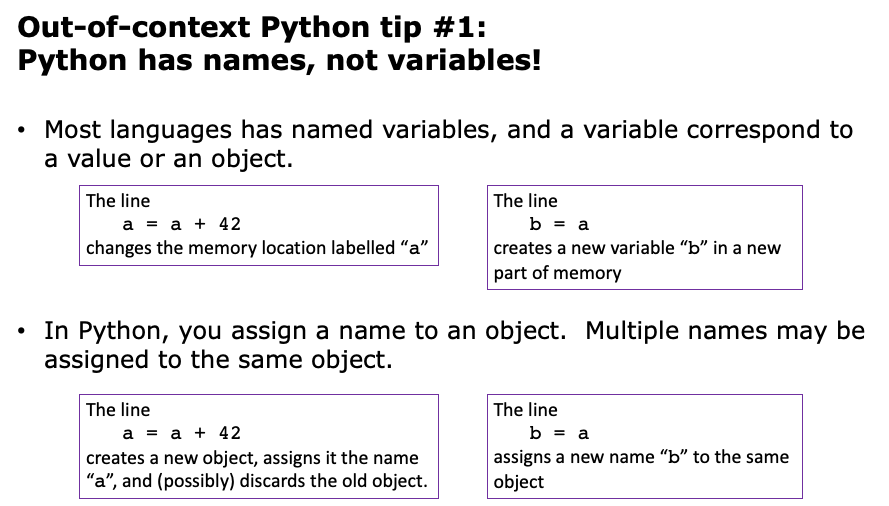

In [3]:
a = ['apple', 'tomato', 'orange']
print(a)

['apple', 'tomato', 'orange']


In [4]:
b = a
b[1] = 'banana'

In [5]:
print("a =", a)
print("b =", b)

a = ['apple', 'banana', 'orange']
b = ['apple', 'banana', 'orange']


In [1]:
a = 42
b = a
b += 7
print(a, b)
c = a
c = c + 8
print(c)

42 49
50


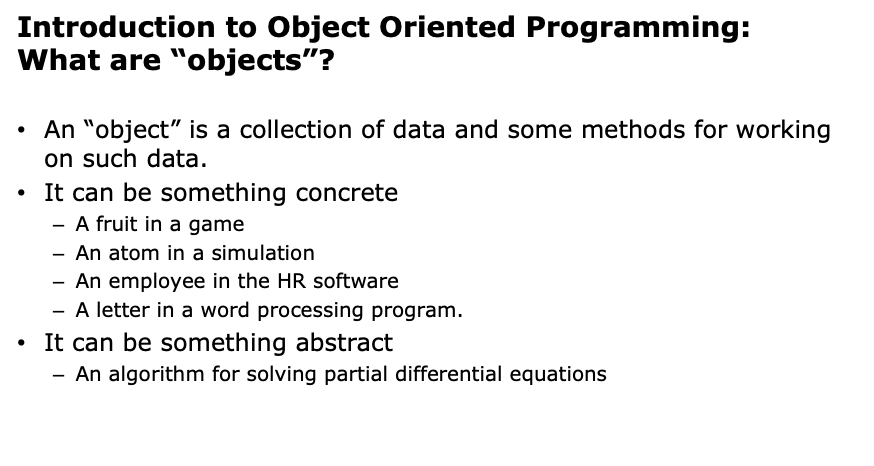

In [7]:
# Creating a string
s = "A string" 
print(s)

A string


The ``.upper()`` method creates an upper-case version

In [8]:
print(s.upper())  

A STRING


Some objects have a length ...

In [9]:
print(s)
print(len(s))

A string
8


... others don't

In [10]:
n = 42
print(len(n))

TypeError: object of type 'int' has no len()

And you cannot make an "uppercase number"

In [11]:
n.upper()

AttributeError: 'int' object has no attribute 'upper'

The behaviour of "operators" depend on the type of the object

In [12]:
7 + 4

11

In [13]:
"Monty" + "Python"

'MontyPython'

In [14]:
"text " * 4

'text text text text '

In [15]:
4 * "more text "

'more text more text more text more text '

In [16]:
# What kind of object is a string (what is its "class")?
type("fido")

str

In [17]:
# Everything is objects in Python
type(str)

type

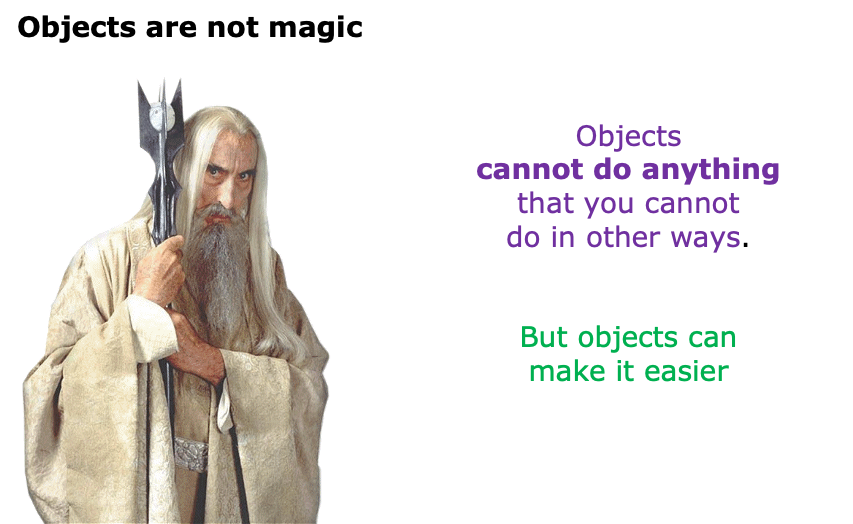

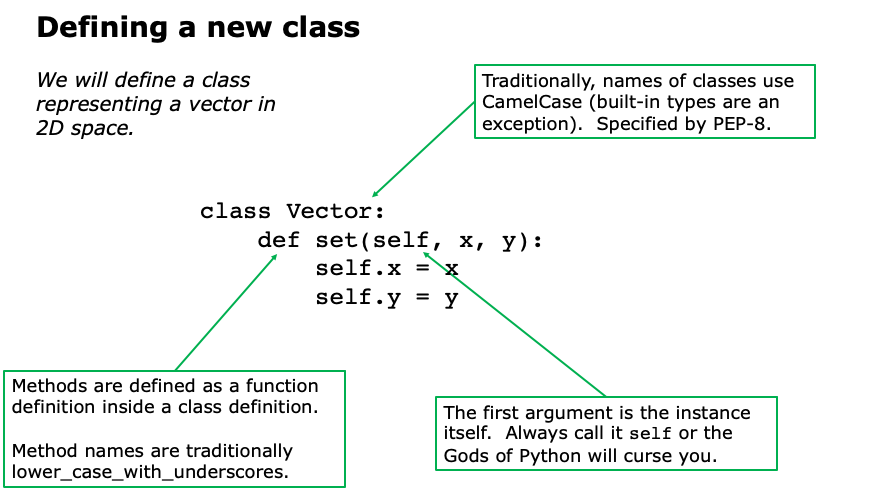

In [31]:
class Vector:
    def set(self, x, y):
        self.x = x
        self.y = y

In [19]:
v = Vector()
v.set(4, 5)
print(v.x, v.y)

4 5


The class should be able to print itself

In [20]:
class Vector:
    def set(self, x, y):
        self.x = x
        self.y = y
    def print(self):
        print("Vector({:.3f}, {:.3f})".format(self.x, self.y))

In [21]:
v = Vector()
v.set(4, 5)
v.print()

Vector(4.000, 5.000)


What happens if we forget to call ``.set()`` ?

In [22]:
v = Vector()
v.print()

AttributeError: 'Vector' object has no attribute 'x'

A vector should be well-defined as soon as it is created.  We in an *initializer*.

We should also add documentation to the class!  It is easy to do, and the seconds spend here can save hours when you try to use is later.

In [3]:
class Vector:
    """A vector in two dimensions.
    
    Usage:
       Vector(x, y)
    """
    def __init__(self, x=0, y=0):
        self.set(x, y)
    def set(self, x, y):
        "Set the coordinates of the vector"
        self.x = x
        self.y = y
    def print(self):
        "Print a string representation of the vector"
        print("Vector({:.3f}, {:.3f})".format(self.x, self.y))

In [6]:
a = Vector(4,4)
a.print()
a.x

Vector(4.000, 4.000)


4

In [25]:
b = Vector()
b.print()

Vector(0.000, 0.000)


Let's add a bit of Vector arithmetics.  This is done by defining a *magic method*.  Methods like ``__init__`` and ``__add__`` where the name starts and ends with two underscores are called *magic*.  They have special meaning in Python.

In [11]:
import math
class Vector:
    """A vector in two dimensions.
    
    Usage:
       Vector(x, y)
    """
    def __init__(self, x, y, z):
        self.set(x, y, z)
    def set(self, x, y, z):
        "Set the coordinates of the vector"
        self.x = x
        self.y = y
        self.z = z
    def print(self):
        "Print a string representation of the vector"
        print("Vector({:.3f}, {:.3f}, {:.3f})".format(self.x, self.y, self.z))
    def __add__(self, other):
        "Vector addition"
        return Vector(self.x + other.x, self.y + other.y, self.z + other.z)
    def __sub__(self, other):
        "Vector substraction"
        return Vector(self.x - other.x, self.y - other.y, self.z - other.z)
    def __mul__(self, other):
        "Vector substraction"
        return Vector(self.x * other.x, self.y * other.y, self.z * other.z)
    def norm(self):
        "Vector substraction"
        return math.sqrt((self.x)**2 + (self.y)**2 + (self.z)**2)
#     def __repr__(self):
#         "The representation of the vector"   # This is a useless docstring!
#         return "Vector({:.3f}, {:.3f}, {:.3f})".format(self.x, self.y, self.z)
    

In [13]:
import math
a = Vector(4,5,6)
a.print()
b = Vector(3,4.4,3)
b.print()
c = a + b
c.print()
#c = Vector(1,2,3)
#c = a * b
#c.print()

f = a.norm()
print(f)
type(f)
# f.print()



Vector(4.000, 5.000, 6.000)
Vector(3.000, 4.400, 3.000)
Vector(7.000, 9.400, 9.000)
8.774964387392123


float

It is nice that the object can print itself.  But other objects are printable using the ``print()`` function in Python.  We want our vector to support this by giving it a string representation.  

First, check what happens if we print a vector:

In [ ]:
print(c)

We should replace this with something more informative!

In [28]:
class Vector:
    """A vector in two dimensions.
    
    Usage:
       Vector(x, y)
    """
    def __init__(self, x, y):
        self.set(x, y)
    def set(self, x, y):
        "Set the coordinates of the vector"
        self.x = x
        self.y = y
    def __add__(self, other):
        "Vector addition"
        return Vector(self.x + other.x, self.y + other.y)

    def __repr__(self):
        "The representation of the vector"   # This is a useless docstring!
        return "Vector({:.3f}, {:.3f})".format(self.x, self.y)

In [29]:
v = Vector(3.14159, 2.71828)
print(v)


Vector(3.142, 2.718)


In [30]:
help(Vector)

Help on class Vector in module __main__:

class Vector(builtins.object)
 |  Vector(x, y)
 |  
 |  A vector in two dimensions.
 |  
 |  Usage:
 |     Vector(x, y)
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      Vector addition
 |  
 |  __init__(self, x, y)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      The representation of the vector
 |  
 |  set(self, x, y)
 |      Set the coordinates of the vector
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

